In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, RobustScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
import pickle

In [10]:
df = pd.read_csv('dataset/pakwheels_used_car_data_v02.csv')
df.head()

,addref,city,assembly,body,make,model,year,engine,transmission,fuel,color,registered,mileage,price
0,7943732,Peshawar,NaN,Sedan,Toyota,Corolla,2013.0,1300.0,Manual,Petrol,Silver Metallic,Lahore,145000,2870000.0
1,7730314,Lahore,NaN,Sedan,Honda,City,2000.0,1300.0,Manual,Petrol,Blue,Lahore,230000,995000.0
2,7943737,Lahore,NaN,Sedan,Toyota,Yaris,2021.0,1300.0,Manual,Petrol,Super White,Punjab,60500,3585000.0
3,7943733,Lahore,NaN,Hatchback,Suzuki,Swift,2017.0,1300.0,Manual,Petrol,Grey,Islamabad,87000,2250000.0
4,7923484,Lahore,NaN,Sedan,Honda,Civic,2017.0,1800.0,Automatic,Petrol,Grey,Lahore,86000,4850000.0


In [11]:
df.shape

(77878, 14)

In [12]:
df['assembly'].unique()

array([nan, 'Imported'], dtype=object)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77878 entries, 0 to 77877
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   addref        77878 non-null  int64  
 1   city          77878 non-null  object 
 2   assembly      24189 non-null  object 
 3   body          68974 non-null  object 
 4   make          77878 non-null  object 
 5   model         77878 non-null  object 
 6   year          73099 non-null  float64
 7   engine        77875 non-null  float64
 8   transmission  77878 non-null  object 
 9   fuel          76972 non-null  object 
 10  color         76398 non-null  object 
 11  registered    77878 non-null  object 
 12  mileage       77878 non-null  int64  
 13  price         77295 non-null  float64
dtypes: float64(3), int64(2), object(9)
memory usage: 8.3+ MB


### Cleaning

In [14]:
df.describe()

,addref,year,engine,mileage,price
count,7.787800e+04,73099.000000,77875.000000,77878.000000,7.729500e+04
mean,7.809878e+06,2012.812610,1408.072550,91109.192750,3.883232e+06
std,2.599523e+05,7.516685,704.459947,89275.336173,5.759480e+06
min,2.748970e+05,1990.000000,3.000000,1.000000,1.100000e+05
25%,7.805760e+06,2007.000000,1000.000000,34000.000000,1.450000e+06
50%,7.865805e+06,2015.000000,1300.000000,80000.000000,2.700000e+06
75%,7.910334e+06,2019.000000,1600.000000,123456.000000,4.500000e+06
max,7.943741e+06,2022.000000,15000.000000,1000000.000000,5.290000e+08


In [15]:
df['fuel'].unique()

array(['Petrol', 'Hybrid', 'Diesel', nan], dtype=object)

In [16]:
# Fill missing values
df['year'].fillna(df['year'].median(), inplace=True)
df['engine'].fillna(df['engine'].mode()[0], inplace=True)
df['fuel'].fillna(df['fuel'].mode()[0], inplace=True)
df['price'].fillna(df['price'].median(), inplace=True)

In [17]:
df[['price']] = df[['price']].astype(int)

In [18]:
df[['year', 'engine']] = df[['year', 'engine']].astype(int)

In [19]:
df[['mileage']] = df[['mileage']].astype(int)

In [20]:
df['assembly'].value_counts()

Imported    24189
Name: assembly, dtype: int64

In [21]:
df['assembly'] = df['assembly'].fillna('Local')
assert df['assembly'].isna().sum() == 0

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77878 entries, 0 to 77877
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   addref        77878 non-null  int64 
 1   city          77878 non-null  object
 2   assembly      77878 non-null  object
 3   body          68974 non-null  object
 4   make          77878 non-null  object
 5   model         77878 non-null  object
 6   year          77878 non-null  int32 
 7   engine        77878 non-null  int32 
 8   transmission  77878 non-null  object
 9   fuel          77878 non-null  object
 10  color         76398 non-null  object
 11  registered    77878 non-null  object
 12  mileage       77878 non-null  int32 
 13  price         77878 non-null  int32 
dtypes: int32(4), int64(1), object(9)
memory usage: 7.1+ MB


In [23]:
df.drop(columns=['body', 'addref', 'color'], inplace=True)

In [24]:
df.head()

,city,assembly,make,model,year,engine,transmission,fuel,registered,mileage,price
0,Peshawar,Local,Toyota,Corolla,2013,1300,Manual,Petrol,Lahore,145000,2870000
1,Lahore,Local,Honda,City,2000,1300,Manual,Petrol,Lahore,230000,995000
2,Lahore,Local,Toyota,Yaris,2021,1300,Manual,Petrol,Punjab,60500,3585000
3,Lahore,Local,Suzuki,Swift,2017,1300,Manual,Petrol,Islamabad,87000,2250000
4,Lahore,Local,Honda,Civic,2017,1800,Automatic,Petrol,Lahore,86000,4850000


In [25]:
df[df['price'] > 7e7]

,city,assembly,make,model,year,engine,transmission,fuel,registered,mileage,price
23,Lahore,Imported,Toyota,Land,2022,3500,Automatic,Petrol,Un-Registered,12000,89800000
646,Lahore,Local,Toyota,Corolla,2021,1598,Manual,Petrol,Lahore,26401,529000000
778,Faisalabad,Imported,Range,Rover,2021,1997,Automatic,Petrol,Islamabad,46403,120000000
959,Lahore,Imported,Mercedes,Benz,2015,120,Automatic,Petrol,Un-Registered,563,71500000
2097,Lahore,Imported,BMW,7,2015,101,Automatic,Petrol,Islamabad,1000,99000000
...,...,...,...,...,...,...,...,...,...,...,...
70459,Karachi,Imported,Lexus,LX,2017,5700,Automatic,Petrol,Karachi,21000,74000000
72230,Islamabad,Imported,Lexus,LX,2017,5700,Automatic,Petrol,Un-Registered,25000,74500000
72332,Karachi,Local,Toyota,Land,2022,3500,Automatic,Petrol,Un-Registered,50,87500000
73800,Islamabad,Local,Toyota,Land,2022,3500,Automatic,Petrol,Un-Registered,12,95000000


In [26]:
df.isna().sum()

city            0
assembly        0
make            0
model           0
year            0
engine          0
transmission    0
fuel            0
registered      0
mileage         0
price           0
dtype: int64

In [27]:
df[df.duplicated()]

,city,assembly,make,model,year,engine,transmission,fuel,registered,mileage,price
86,Lahore,Local,Honda,Civic,2015,1800,Manual,Petrol,Lahore,126000,2975000
2660,Lahore,Local,Suzuki,Wagon,2018,1000,Manual,Petrol,Lahore,90000,2250000
3115,Lahore,Imported,Toyota,Yaris,2020,1000,Automatic,Petrol,Un-Registered,32745,5390000
3701,Karachi,Local,Honda,Civic,2019,1800,Automatic,Petrol,Sindh,42000,5500000
4351,Karachi,Imported,Suzuki,Alto,2007,660,Automatic,Petrol,Sindh,123,1450000
...,...,...,...,...,...,...,...,...,...,...,...
77387,Karachi,Local,Honda,Civic,2007,1800,Manual,Petrol,Karachi,97000,1595000
77536,Lahore,Local,Suzuki,Wagon,2017,1000,Manual,Petrol,Lahore,75000,2350000
77563,Lahore,Local,Toyota,Fortuner,2015,2800,Automatic,Diesel,Un-Registered,5,20700000
77579,Karachi,Imported,Nissan,Dayz,2018,660,Automatic,Petrol,Karachi,37000,3050000


In [28]:
# Removing duplicates
df.drop_duplicates(inplace=True)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77203 entries, 0 to 77877
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   city          77203 non-null  object
 1   assembly      77203 non-null  object
 2   make          77203 non-null  object
 3   model         77203 non-null  object
 4   year          77203 non-null  int32 
 5   engine        77203 non-null  int32 
 6   transmission  77203 non-null  object
 7   fuel          77203 non-null  object
 8   registered    77203 non-null  object
 9   mileage       77203 non-null  int32 
 10  price         77203 non-null  int32 
dtypes: int32(4), object(7)
memory usage: 5.9+ MB


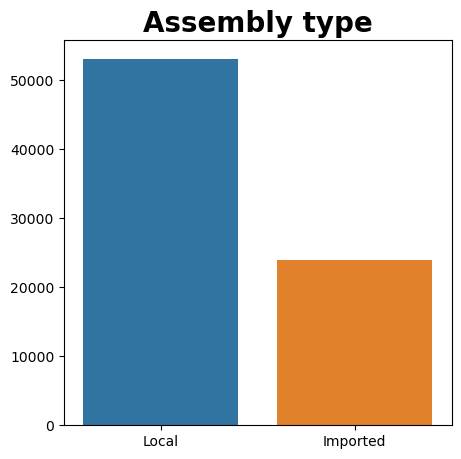

In [30]:
plt.figure(figsize=(5,5))
sns.barplot(x=df['assembly'].value_counts().index, y=df['assembly'].value_counts().values)
plt.title('Assembly type', fontdict ={'fontweight':'bold','fontsize':20})
plt.show()

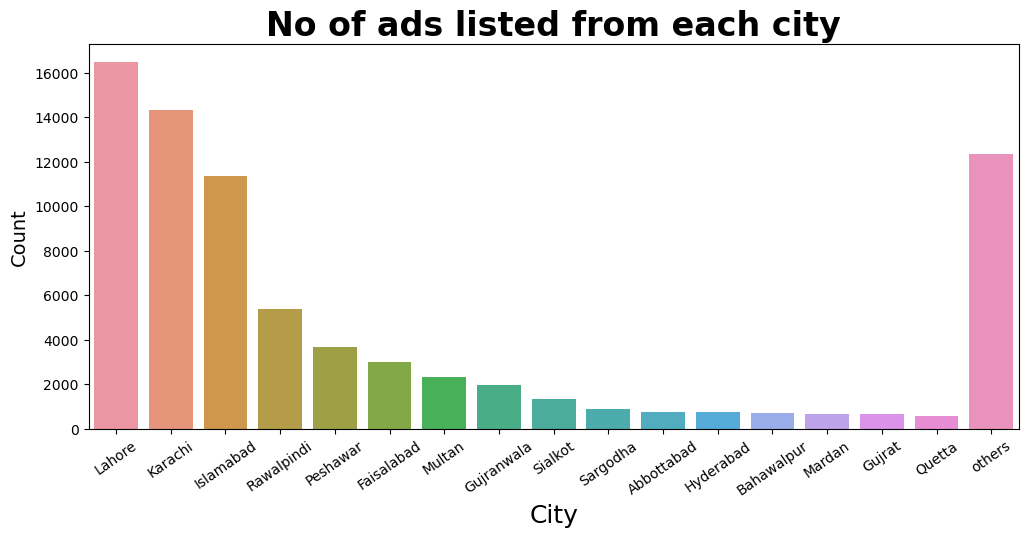

In [31]:
# Get top 16 cities by ad count
city_counts = df['city'].value_counts().head(16)

# Create cities_list with 'others' category
cities_list = {
    'city': city_counts.index.tolist(),
    'ads': city_counts.values.tolist()
}

# Calculate 'others' category
others_count = df.shape[0] - np.sum(cities_list['ads'])
cities_list['city'].append('others')
cities_list['ads'].append(others_count)

# Plotting
plt.figure(figsize=(12, 5))
sns.barplot(y=cities_list['ads'], x=cities_list['city'])
plt.title('No of ads listed from each city', fontdict={'fontweight': 'bold', 'fontsize': 24})
plt.xticks(rotation=35)
plt.xlabel('City', fontdict={'fontsize': 18})
plt.ylabel('Count', fontdict={'fontsize': 14})
plt.show()

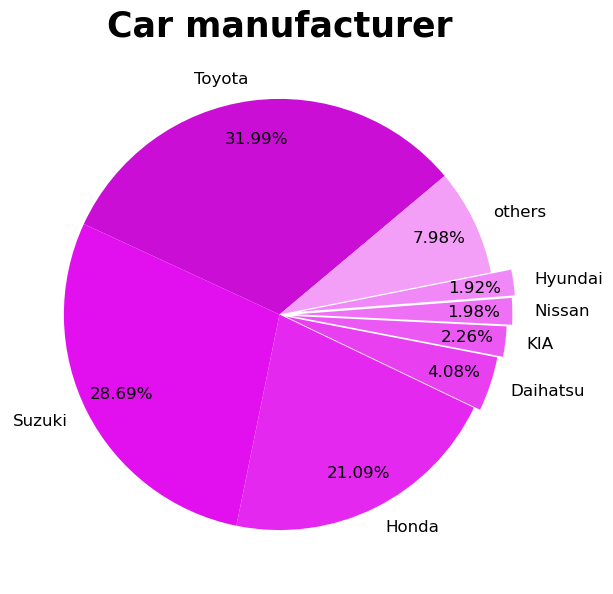

In [32]:
make_counts = df['make'].value_counts().head(7)
make_list = {'maker': make_counts.index.tolist(), 'count': make_counts.values.tolist()}
make_list['maker'].append('others')
make_list['count'].append(df.shape[0] - np.array(make_list['count']).sum())
plt.figure(figsize=(7,7))
explode = (0,0,0,0.03,0.055, 0.08, 0.095, 0)
color = ['#cb0ed6', '#e210ee', '#e528f0', '#e840f1', '#eb58f3', '#ee70f5', '#f188f7', '#f39ff8']
plt.pie(make_list['count'], labels=make_list['maker'], explode=explode, autopct='%.2f%%', startangle=40,  pctdistance=.82, colors=color, textprops={'fontsize': 12})
plt.title('Car manufacturer', fontdict ={'fontweight':'bold','fontsize':25})
plt.show()


In [33]:
#Most popular car model by top 10 manufacturer¶
df.groupby(['make', 'model'])[['make', 'model']].size().reset_index().sort_values(by=[0, 'model'], ascending=[False, True]).drop_duplicates(subset=['make'], keep='first').rename(columns={'model':'most popular model', 0:'count'}).head(10)

,make,most popular model,count
403,Toyota,Corolla,12761
142,Honda,Civic,8209
366,Suzuki,Mehran,4557
217,KIA,Sportage,957
91,Daihatsu,Mira,901
252,Mercedes,Benz,618
180,Hyundai,Santro,559
229,MG,HS,437
267,Mitsubishi,Pajero,418
282,Nissan,Dayz,411


C:\Users\Hamza\AppData\Local\Temp\ipykernel_13156\2641793061.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


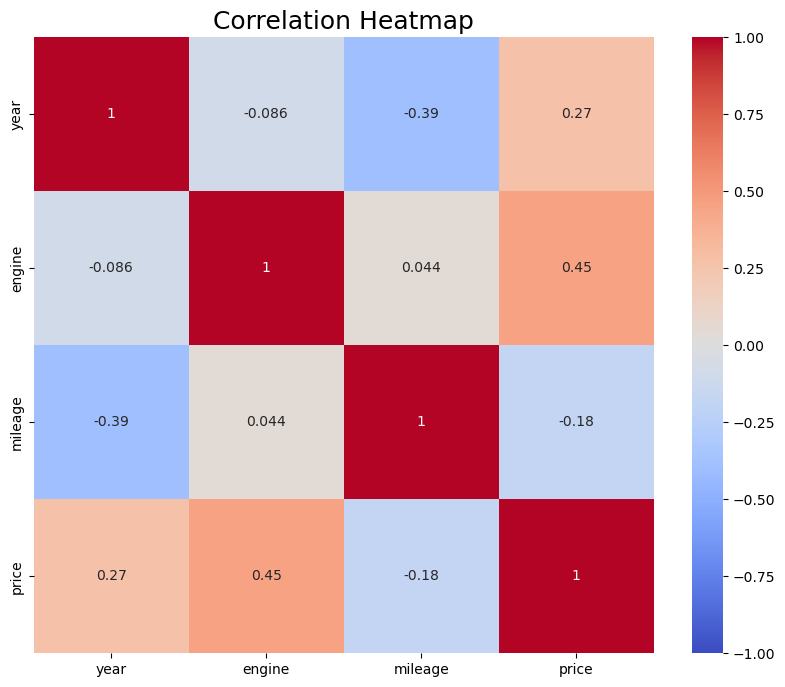

In [34]:
# Calculate correlation matrix
corr_matrix = df.corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap', fontsize=18)
plt.show()

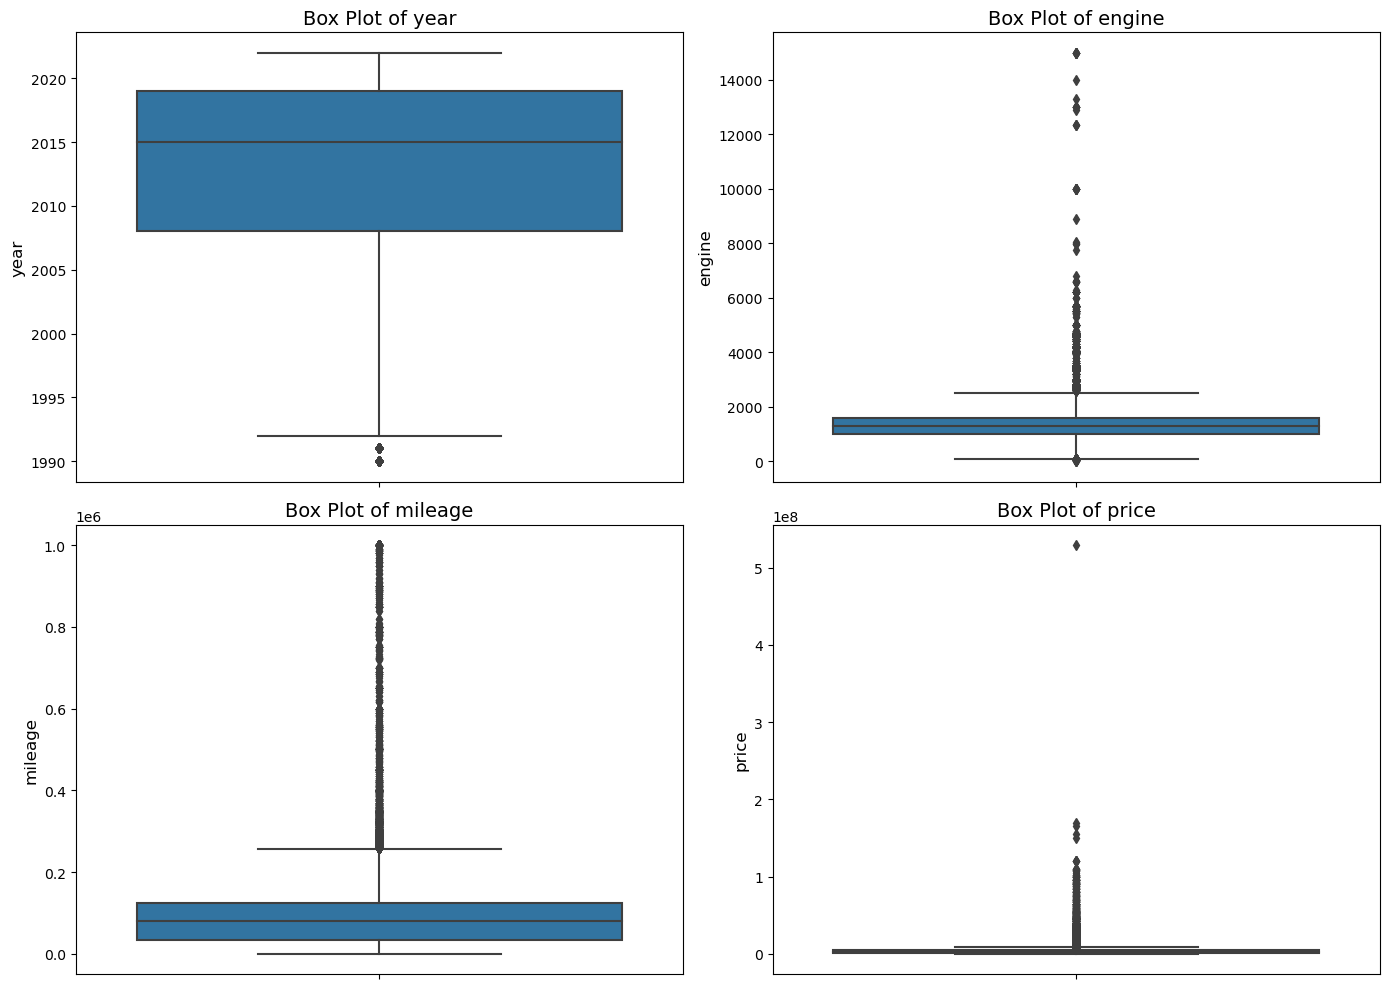

In [35]:
# Plotting box plots for the selected columns
columns_to_plot = ['year', 'engine', 'mileage', 'price']

plt.figure(figsize=(14, 10))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[column])
    plt.title(f'Box Plot of {column}', fontsize=14)
    plt.ylabel(column, fontsize=12)

plt.tight_layout()
plt.show()

In [36]:
# Select columns to scale
columns_to_scale = ['engine', 'mileage', 'price']

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the selected columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

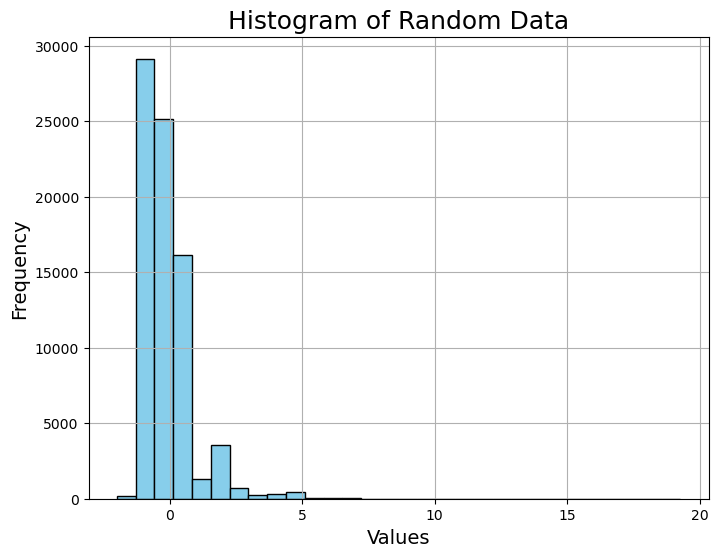

In [37]:
#data = np.random.normal(loc=0, scale=1, size=1000)  # Generate random data (normal distribution)

# Plot histogram
plt.figure(figsize=(8, 6))
plt.hist(df['engine'], bins=30, edgecolor='black', color='skyblue')  # Adjust bins as needed
plt.title('Histogram of Random Data', fontsize=18)
plt.xlabel('Values', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.show()

In [38]:
df

,city,assembly,make,model,year,engine,transmission,fuel,registered,mileage,price
0,Peshawar,Local,Toyota,Corolla,2013,-0.153768,Manual,Petrol,Lahore,0.601678,-0.174312
1,Lahore,Local,Honda,City,2000,-0.153768,Manual,Petrol,Lahore,1.552980,-0.500368
2,Lahore,Local,Toyota,Yaris,2021,-0.153768,Manual,Petrol,Punjab,-0.344028,-0.049975
3,Lahore,Local,Suzuki,Swift,2017,-0.153768,Manual,Petrol,Islamabad,-0.047446,-0.282128
4,Lahore,Local,Honda,Civic,2017,0.555216,Automatic,Petrol,Lahore,-0.058637,0.170004
...,...,...,...,...,...,...,...,...,...,...,...
77873,Daska,Local,Honda,Civic,2019,0.555216,Automatic,Petrol,Islamabad,-0.372008,0.298688
77874,Abbottabad,Imported,Suzuki,Alto,2015,-1.061268,Automatic,Petrol,Islamabad,-0.293665,-0.252565
77875,Faisalabad,Imported,MG,HS,2021,0.115646,Automatic,Petrol,Un-Registered,-0.965172,0.630831
77876,Quetta,Local,Suzuki,Baleno,2005,-0.153768,Manual,Petrol,Lahore,-0.808487,-0.456025


In [39]:
categorical_columns = ['assembly', 'city', 'make', 'model', 'transmission', 'fuel', 'registered']
label_encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

In [40]:
df.sample(4)

,city,assembly,make,model,year,engine,transmission,fuel,registered,mileage,price
24193,162,0,62,121,2004,-0.153768,1,2,64,2.981355,-0.416898
40645,132,1,36,352,2020,0.838810,0,2,54,-0.685378,0.526493
41396,12,1,60,133,2016,-0.579158,1,2,64,-0.215322,-0.395161
48001,235,0,16,188,2021,-1.061268,1,2,116,-0.797295,-0.099536


In [41]:
# Select features and target variable
X = df.drop('price', axis=1)
y = df['price']

In [42]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
# Train the Linear Regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [44]:
# Predict on the test set
y_pred_linear = linear_reg.predict(X_test)

In [45]:
# Evaluate the model
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f"Linear Regression:\n Mean Squared Error: {mse_linear}\n R-squared: {r2_linear}\n")

Linear Regression:
 Mean Squared Error: 0.5425148997919045
 R-squared: 0.38921001679909695



In [46]:
# Train the Ridge Regression model
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)

Ridge()

In [47]:
# Predict on the test set
y_pred_ridge = ridge_reg.predict(X_test)

In [48]:
# Evaluate the model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge Regression:\n Mean Squared Error: {mse_ridge}\n R-squared: {r2_ridge}\n")

Ridge Regression:
 Mean Squared Error: 0.5425151729067064
 R-squared: 0.3892097093130069



In [49]:
# Train the Lasso Regression model
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.1)

In [50]:
# Predict on the test set
y_pred_lasso = lasso_reg.predict(X_test)

In [51]:
# Evaluate the model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Lasso Regression:\n Mean Squared Error: {mse_lasso}\n R-squared: {r2_lasso}\n")

Lasso Regression:
 Mean Squared Error: 0.5804509984749079
 R-squared: 0.3464996892372414



In [52]:
# Train the Random Forest model
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [53]:
# Predict on the test set
y_pred_rf = rf_reg.predict(X_test)

In [54]:
# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest:\n Mean Squared Error: {mse_rf}\n R-squared: {r2_rf}\n")

Random Forest:
 Mean Squared Error: 0.22339036915692023
 R-squared: 0.7484961244807549



In [55]:
# Train the Gradient Boosting model
gb_reg = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_reg.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [56]:
# Predict on the test set
y_pred_gb = gb_reg.predict(X_test)

In [57]:

# Evaluate the model
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Gradient Boosting:\n Mean Squared Error: {mse_gb}\n R-squared: {r2_gb}\n")

Gradient Boosting:
 Mean Squared Error: 0.25808622434170997
 R-squared: 0.7094338225723882



In [58]:
# Train the Decision tree model
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [59]:
# Predict on the test set
y_pred_dt = dt_reg.predict(X_test)

In [60]:
# Evaluate the model
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Gradient Boosting:\n Mean Squared Error: {mse_dt}\n R-squared: {r2_dt}\n")

Gradient Boosting:
 Mean Squared Error: 0.360434588678155
 R-squared: 0.5942049952025303



In [61]:
# Create and train the model
ada_reg = AdaBoostRegressor()
ada_reg.fit(X_train, y_train)

AdaBoostRegressor()

In [62]:
# Predict on the test set
y_pred_ada = ada_reg.predict(X_test)

In [63]:
# Evaluate the model
mse_ada = mean_squared_error(y_test, y_pred_ada)
r2_ada = r2_score(y_test, y_pred_ada)

print(f"Gradient Boosting:\n Mean Squared Error: {mse_ada}\n R-squared: {r2_ada}\n")

Gradient Boosting:
 Mean Squared Error: 0.9270994363992011
 R-squared: -0.04377418832374835



In [64]:
# Create and train the model
xgb_reg = XGBRegressor()
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [65]:
# Predict on the test set
y_pred_xgb = xgb_reg.predict(X_test)

In [66]:
# Evaluate the model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"Gradient Boosting:\n Mean Squared Error: {mse_xgb}\n R-squared: {r2_xgb}\n")

Gradient Boosting:
 Mean Squared Error: 0.3057581460639879
 R-squared: 0.655762426120284



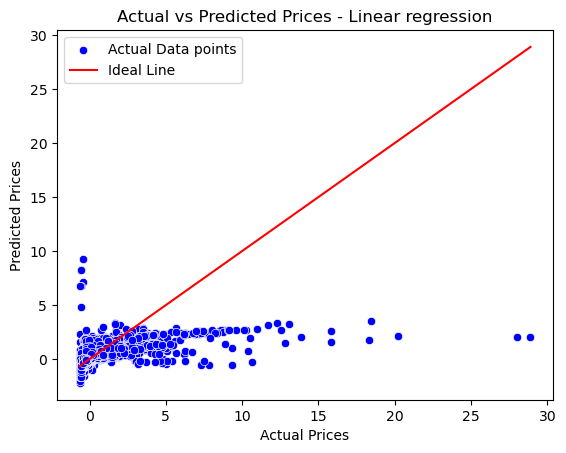

In [67]:
sns.scatterplot(x=y_test, y=y_pred_linear, color='blue', label='Actual Data points')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Ideal Line')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices - Linear regression')
plt.legend()
plt.show()

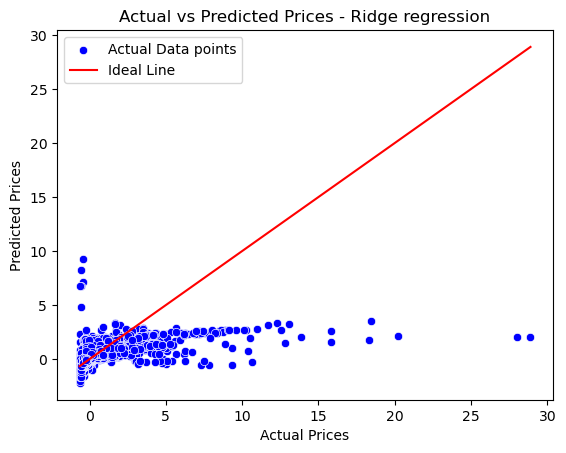

In [68]:
# Scatter plot of the actual vs predicted values for Ridge regression model
sns.scatterplot(x=y_test, y=y_pred_ridge, color='blue', label='Actual Data points')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Ideal Line')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices - Ridge regression')
plt.legend()
plt.show()

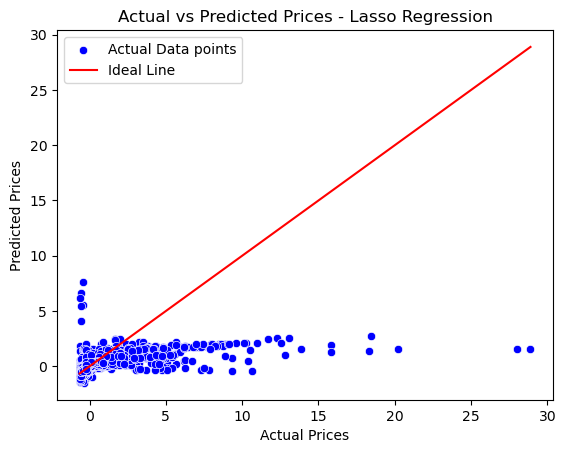

In [69]:
# Scatter plot of the actual vs predicted values for Lasso Regression model
sns.scatterplot(x=y_test, y=y_pred_lasso, color='blue', label='Actual Data points')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Ideal Line')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices - Lasso Regression')
plt.legend()
plt.show()

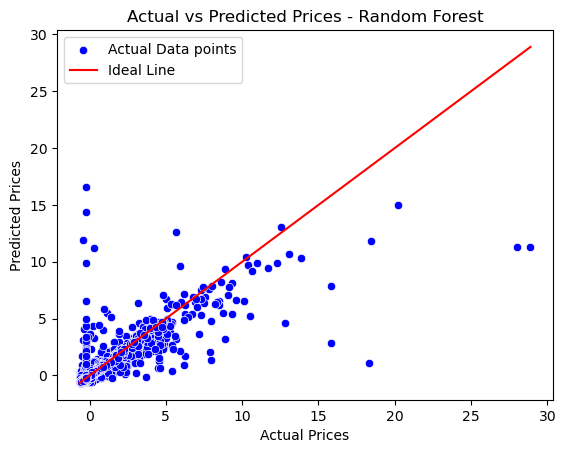

In [70]:
# Scatter plot of the actual vs predicted values for Random Forest model
sns.scatterplot(x=y_test, y=y_pred_rf, color='blue', label='Actual Data points')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Ideal Line')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices - Random Forest')
plt.legend()
plt.show()

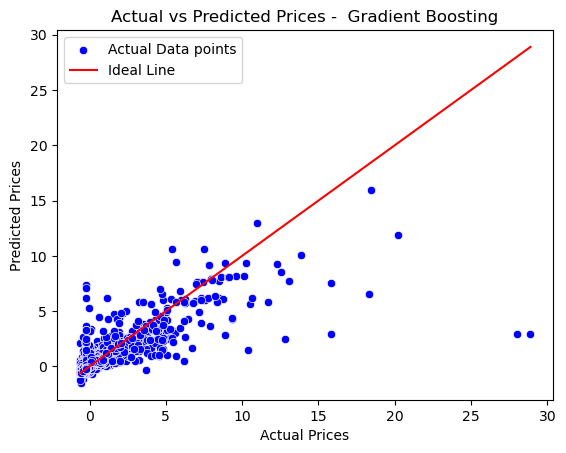

In [71]:
# Scatter plot of the actual vs predicted values for gradient Boosting Regression model
sns.scatterplot(x=y_test, y=y_pred_gb, color='blue', label='Actual Data points')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Ideal Line')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices -  Gradient Boosting')
plt.legend()
plt.show()

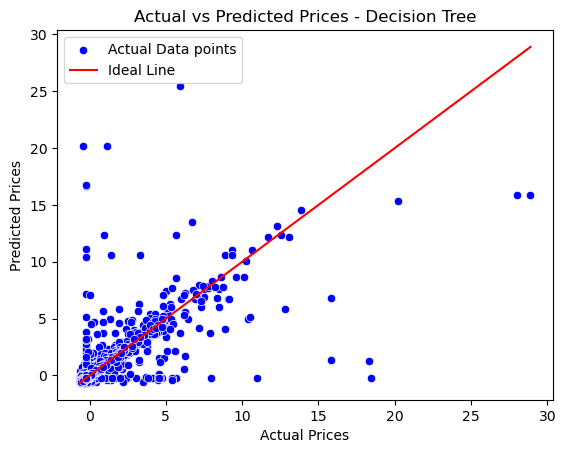

In [72]:
# Scatter plot of the actual vs predicted values for Decision Tree Regresion model
sns.scatterplot(x=y_test, y=y_pred_dt, color='blue', label='Actual Data points')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Ideal Line')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices - Decision Tree')
plt.legend()
plt.show()

In [73]:
# Combine actual and predicted values side by side
results = np.column_stack((y_test, y_pred_rf))

# Printing the results
print("Actual Values  |  Predicted Values")
print("-----------------------------")
for actual, predicted in results:
    print(f"{actual:14.2f} |  {predicted:12.2f}")

Actual Values  |  Predicted Values
-----------------------------
         -0.53 |         -0.51
          0.00 |          0.00
         -0.16 |         -0.18
         -0.41 |         -0.40
          0.04 |          0.13
         -0.52 |         -0.52
         -0.21 |         -0.36
          2.44 |          2.29
         -0.19 |         -0.22
          0.09 |          0.11
          1.12 |          1.05
         -0.54 |         -0.53
          0.20 |          0.18
         -0.60 |         -0.62
         -0.55 |         -0.52
          0.34 |          0.31
         -0.59 |         -0.61
         -0.31 |         -0.31
         -0.29 |         -0.29
         -0.30 |         -0.27
         -0.45 |         -0.35
         -0.15 |         -0.10
         -0.31 |         -0.33
         -0.35 |         -0.34
         -0.28 |         -0.27
         -0.39 |         -0.37
         -0.33 |         -0.37
         -0.17 |         -0.23
          0.46 |          0.55
         -0.12 |         -0.16
     

In [74]:
residual = actual- y_pred_rf.reshape(-1)
print(residual)

[ 0.30051998 -0.20656927 -0.02331958 ...  0.24901751  0.08432262
  0.02286745]


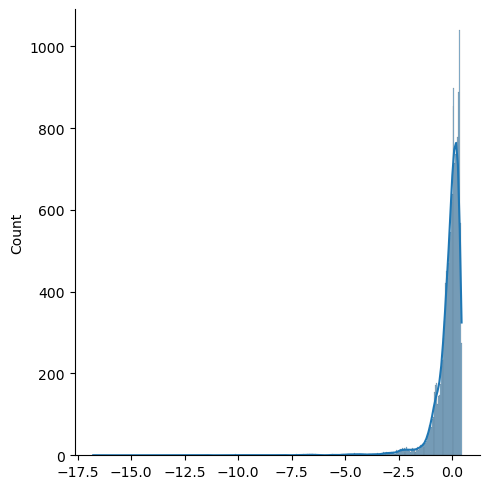

In [75]:
sns.displot(residual, kde=True)

In [76]:
# Display results
model_scores = {
    'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Random Forest', 'Gradient Boosting', 'Decision Tree'],
    'Mean Squared Error': [mse_linear, mse_ridge, mse_lasso, mse_rf, mse_gb, mse_dt],
    'R-squared': [r2_linear, r2_ridge, r2_lasso, r2_rf, r2_gb, r2_dt]
}

# Create DataFrame
results_df = pd.DataFrame(model_scores)

# Sort DataFrame by Mean Squared Error (lower is better)
results_df_sorted_mse = results_df.sort_values(by='Mean Squared Error')

# Sort DataFrame by R-squared (higher is better)
results_df_sorted_r2 = results_df.sort_values(by='R-squared', ascending=False)

print("Model Performance based on Mean Squared Error (lower is better):")
print(results_df_sorted_mse)

print("\nModel Performance based on R-squared (Higher is better):")
print(results_df_sorted_r2)


Model Performance based on Mean Squared Error (lower is better):
               Model  Mean Squared Error  R-squared
3      Random Forest            0.223390   0.748496
4  Gradient Boosting            0.258086   0.709434
5      Decision Tree            0.360435   0.594205
0  Linear Regression            0.542515   0.389210
1   Ridge Regression            0.542515   0.389210
2   Lasso Regression            0.580451   0.346500

Model Performance based on R-squared (Higher is better):
               Model  Mean Squared Error  R-squared
3      Random Forest            0.223390   0.748496
4  Gradient Boosting            0.258086   0.709434
5      Decision Tree            0.360435   0.594205
0  Linear Regression            0.542515   0.389210
1   Ridge Regression            0.542515   0.389210
2   Lasso Regression            0.580451   0.346500


In [77]:
df.head()

,city,assembly,make,model,year,engine,transmission,fuel,registered,mileage,price
0,214,1,62,121,2013,-0.153768,1,2,64,0.601678,-0.174312
1,162,1,27,109,2000,-0.153768,1,2,64,1.552980,-0.500368
2,162,1,62,421,2021,-0.153768,1,2,93,-0.344028,-0.049975
3,162,1,60,365,2017,-0.153768,1,2,47,-0.047446,-0.282128
4,162,1,27,110,2017,0.555216,0,2,64,-0.058637,0.170004


In [78]:
# Save the random forest model using pickle
with open('saved_model/car_predictor.pkl', 'wb') as file:
    pickle.dump(rf_reg, file)


In [79]:
import pickle
import numpy as np
# Load the saved model
with open('saved_model/car_predictor.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

city = 162
assembly = 1
make = 27
model = 109
year = 2000
engine = -0.153768
transmission = 1
fuel = 2
registered = 64
mileage = 1.552980
    
# Example input data (scaled)
input_data = np.array([[city, assembly, make, model, year, engine, transmission, fuel, registered, mileage]])

# Predict with the loaded model
scaled_prediction = loaded_model.predict(input_data)

print(scaled_prediction)

[-0.49580688]


C:\Users\Hamza\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [80]:
import pickle
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Define the columns to scale and the categorical columns
columns_to_scale = ['engine', 'mileage', 'price']
categorical_columns = ['assembly', 'city', 'make', 'model', 'transmission', 'fuel', 'registered']

# Assuming df is your DataFrame
# Fit your scaler and encoder
scaler = StandardScaler()
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

label_encoder_dict = {}
for col in categorical_columns:
    label_encoder = LabelEncoder()
    df[col] = label_encoder.fit_transform(df[col])
    label_encoder_dict[col] = label_encoder

# Save the scaler and encoder
with open('saved_model/scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

with open('saved_model/label_encoder.pkl', 'wb') as encoder_file:
    pickle.dump(label_encoder_dict, encoder_file)
